<a href="https://colab.research.google.com/github/EB28/DataScience/blob/main/ML02_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


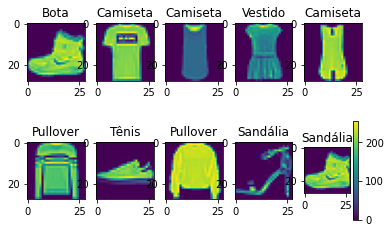

In [3]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

In [4]:
#normalização

imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 24s 14ms/step - loss: 0.5248 - accuracy: 0.8140 - val_loss: 0.4219 - val_accuracy: 0.8463
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3962 - accuracy: 0.8566 - val_loss: 0.3671 - val_accuracy: 0.8674
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3646 - accuracy: 0.8664 - val_loss: 0.3969 - val_accuracy: 0.8507
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3407 - accuracy: 0.8749 - val_loss: 0.3597 - val_accuracy: 0.8695
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3233 - accuracy: 0.8804 - val_loss: 0.3349 - val_accuracy: 0.8792


In [14]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.0970441 ,  0.05909399,  0.06671321, ...,  0.05779026,
        -0.03668819,  0.0622303 ],
       [ 0.06478395, -0.10779329, -0.0720737 , ..., -0.0388212 ,
         0.07200605, -0.10444348],
       [ 0.00269756, -0.23248522,  0.08812799, ...,  0.02972741,
        -0.02252476, -0.16895126],
       ...,
       [ 0.06121388,  0.06972799, -0.05583092, ...,  0.01029766,
        -0.08226442, -0.07196108],
       [-0.00918841,  0.10127442, -0.03196345, ..., -0.02282627,
        -0.07009891,  0.04025665],
       [ 0.11714004,  0.03829796, -0.12836479, ..., -0.0122617 ,
        -0.00849417, -0.01367416]], dtype=float32)

In [31]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.602225  , 0.21030891, 0.7083502 , ..., 0.01304846, 0.82257813,
         0.8989694 ],
        [0.45919767, 0.81661576, 0.08885633, ..., 0.28020558, 0.55762386,
         0.49375758],
        [0.01588803, 0.19592407, 0.0040919 , ..., 0.98272926, 0.9380571 ,
         0.17238301],
        ...,
        [0.96985084, 0.23936725, 0.37341544, ..., 0.24293862, 0.7805334 ,
         0.29270557],
        [0.46512967, 0.8641529 , 0.77608687, ..., 0.19628714, 0.5547248 ,
         0.9346039 ],
        [0.09606447, 0.36695808, 0.08669361, ..., 0.26310667, 0.27609938,
         0.7728927 ]], dtype=float32),
 array([ 2.73921102e-01, -1.31515503e-01,  2.76462197e-01, -1.89309433e-01,
        -2.38809869e-01, -7.49918669e-02,  2.67462134e-01,  2.84026384e-01,
         1.40897945e-01,  1.57415479e-01,  1.38571784e-01,  5.14076352e-01,
        -5.13565168e-02, -1.91902950e-01, -4.31358777e-02,  1.27115428e-01,
         2.37954840e-01,  4.26181048e-01,  3.54218394e-01, -1.03635611e-02,
         2.466

In [32]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 119.6603 - accuracy: 0.4070 - val_loss: 14.1547 - val_accuracy: 0.7372
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 31.0785 - accuracy: 0.6284 - val_loss: 12.4481 - val_accuracy: 0.7257
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 14.3637 - accuracy: 0.6919 - val_loss: 5.8367 - val_accuracy: 0.7538
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 7.2385 - accuracy: 0.7248 - val_loss: 3.6526 - val_accuracy: 0.7984
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 4.0356 - accuracy: 0.7502 - val_loss: 2.4923 - val_accuracy: 0.7831


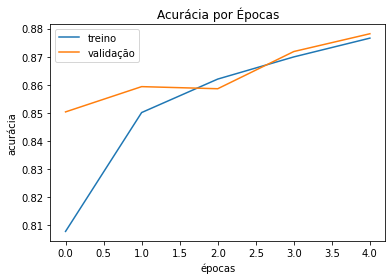

In [27]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

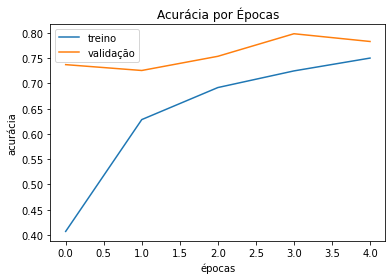

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [34]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [41]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados])

In [42]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0957


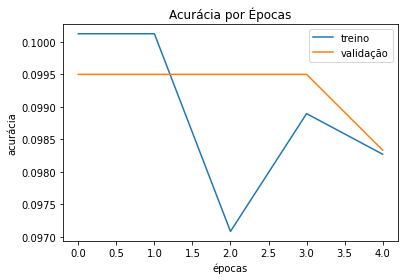

In [38]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

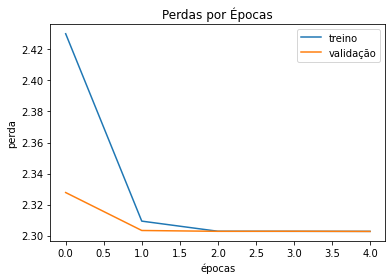

In [39]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [6]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

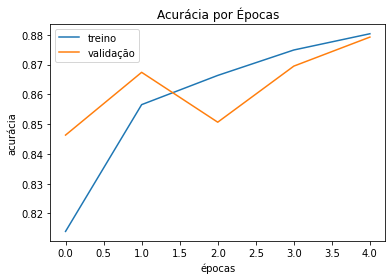

In [7]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

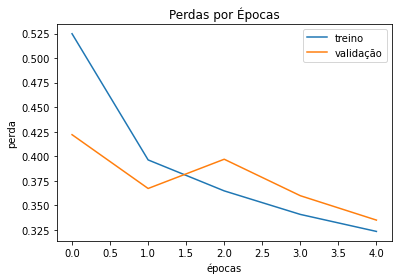

In [8]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [9]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste:  2
número da imagem de teste:  2
313/313 [==============================] - 1s 2ms/step
Resultado teste modelo salvo:  2
número da imagem de teste:  2


In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acuracia do teste', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 50.1396 - accuracy: 0.8622
Perda do teste 50.13961410522461
Acuracia do teste 0.8622000217437744
